# Bar Path Tracker:

## Imports

In [76]:
import numpy as np
import os
import sys
import pandas
import cv2

repo_path = r'C:\Users\ellio\OneDrive\Desktop\GitHub\bar_path_tracker'

## Basic Utils:

In [77]:
def open_and_display_video(path:str) -> None:
    
    vid = cv2.VideoCapture(os.path.join(repo_path, path))
    if (vid.isOpened()== False): 
        print("Error opening video stream or file")
    else:
        print(f"Playing video at {path}. Hit 'q' to quit.")
    
    while(vid.isOpened()):
        # Capture frame-by-frame
        ret, frame = vid.read()
        
        if ret == True:
            cv2.imshow('Frame',frame)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        else: 
            break
    # When everything done, release the video capture object
    vid.release()
    # Closes all the frames
    cv2.destroyAllWindows()
    
open_and_display_video(r'data\example_videos\squat_example.mp4')

Playing video at data\example_videos\squat_example.mp4. Hit 'q' to quit.


In [78]:
tracker = cv2.TrackerCSRT_create()
tracker_type = "CSRT"

In [153]:
# Get the video file and read it

bar_path = []
times = []

cv2.destroyAllWindows()
video = cv2.VideoCapture(os.path.join(repo_path, r'data\example_videos\squat_example.mp4'))
ret, frame = video.read()
if not ret:
    print('cannot read the video')

frame_height, frame_width = frame.shape[:2]

frame_height = 2000
frame_width = 2000

# Resize the video for a more convinient view
frame = cv2.resize(frame, [frame_width//2, frame_height//2])

mask = np.zeros_like(frame)

# Initialize video writer to save the results
output = cv2.VideoWriter(f'{tracker_type}.avi', 
                         cv2.VideoWriter_fourcc(*'XVID'), 60.0, 
                         (frame_width//2, frame_height//2), True)

# Select the bounding box in the first frame
bbox = cv2.selectROI(frame, False)
previous_c = (int(bbox[0] + bbox[2]/2), int(bbox[1] + bbox[3]/2))

bar_path.append(previous_c)

ret = tracker.init(frame, bbox)
# Start tracking

while True:
    ret, frame = video.read()
    if not ret:
        break

    frame = cv2.resize(frame, [frame_width//2, frame_height//2])
    timer = cv2.getTickCount()
    ret, bbox = tracker.update(frame)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    if ret:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))

        c = (int(bbox[0] + bbox[2]/2), int(bbox[1] + bbox[3]/2))
        bar_path.append([c[0], c[1]])
        times.append(timer)

        mask = cv2.line(mask, previous_c, c, (0,0,255), 5)
        frame = cv2.rectangle(frame, p1, p2, (255,255,255), 2, 1)

    else:
        cv2.putText(frame, "Tracking failure detected", (100,80), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75,(255,0,0),2)
    cv2.putText(frame, tracker_type + " Tracker", (0,20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0),2)
    cv2.putText(frame, "FPS : " + str(int(fps)), (0,50), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0),2)
    cv2.imshow("Tracking", cv2.add(frame, mask))
    output.write(frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    previous_c = c
        
video.release()
output.release()
cv2.destroyAllWindows()

[-0.00000000e+00 -0.00000000e+00  1.30260707e-12 ...  1.54351969e-15
 -7.79255865e-13 -3.91711284e-14]


[]

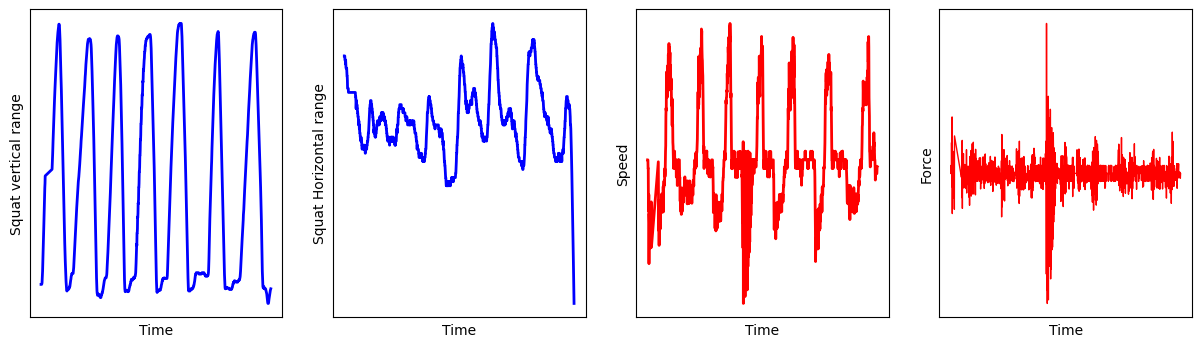

In [172]:
import matplotlib.pyplot as plt
bar_path = np.array(bar_path)

f, axs = plt.subplots(1,4, figsize = (15,4))

axs[0].plot(times, bar_path[1:,1], c = "b", linewidth  = 2)
axs[0].set_ylabel("Squat vertical range")
axs[0].set_xlabel("Time")
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].plot(times, bar_path[1:,0], c = "b", linewidth  = 2)
axs[1].set_ylabel("Squat Horizontal range")
axs[1].set_xlabel("Time")
axs[1].set_xticks([])
axs[1].set_yticks([])

times = np.array(times)

speeds = np.array(bar_path[2:,1]-bar_path[1:-1,1]) / np.array(times[:-1] - times[1:])

axs[2].plot(times[1:], speeds, c = "r", linewidth  = 2)
axs[2].set_ylabel("Speed")
axs[2].set_xlabel("Time")
axs[2].set_xticks([])
axs[2].set_yticks([])

accelerations = np.array(speeds[1:]-speeds[:-1]) / np.array(times[:-2] - times[2:])

print(accelerations)

axs[3].plot(times[2:], accelerations, c = "r", linewidth  = 1)
axs[3].set_ylabel("Force")
axs[3].set_xlabel("Time")
axs[3].set_xticks([])
axs[3].set_yticks([])

In [157]:
len(times)

1198